In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [15]:
def get_absLoss(fileLoss:str)->pd.Series:
    df_lossOfModel = pd.read_csv(fileLoss)
    return np.abs(df_lossOfModel.iloc[:,0]-df_lossOfModel.iloc[:,1])

In [16]:
# 计算每种模型的绝对Loss
LossBiLSTM = get_absLoss("./HowthHarbour2017/Howth Harbour2017/BiLSTMpre.csv")
LossGRU = get_absLoss("./HowthHarbour2017/Howth Harbour2017/BiGRUpre.csv")
LossLightGBM = get_absLoss("./HowthHarbour2017/Howth Harbour2017/LightGBMpre-middle.csv")
LossCNNBiGRU = get_absLoss("./HowthHarbour2017/Howth Harbour2017/CNN-BiLSTMpre-middle.csv")
LossLightGBM_GRU = get_absLoss("./HowthHarbour2017/Howth Harbour2017/BiGRU+LightGBM.csv")
LossLightGBM_CNNBiGRU = get_absLoss("./HowthHarbour2017/Howth Harbour2017/CNN-BiLSTM+LightGBM.csv")



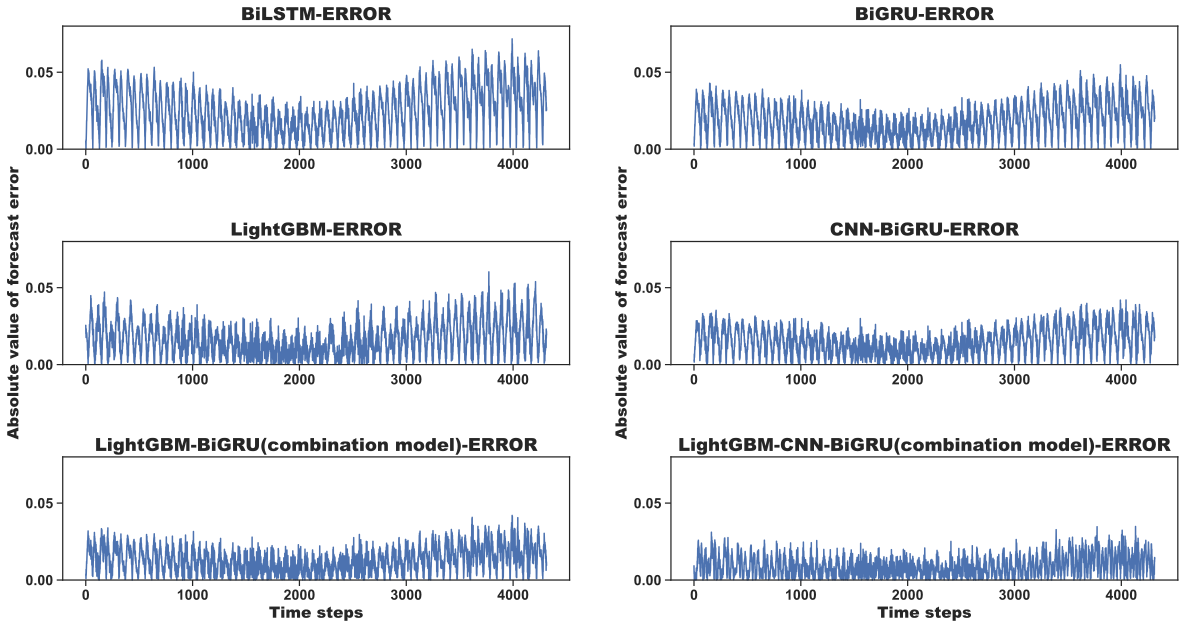

In [17]:
# Seires1[Seires1<0.2]
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

fig.subplots_adjust(left=None,bottom=None,right=None,top=None,hspace=0.75)
# ax2 = fig.add_subplot(2,1,2)
sns.set_theme(style="white")

sns.set(context='notebook', style='ticks', font_scale=1.5,rc = {"font.weight":900})
rc = {"weight":900}
# dataPlot = df_Ballycotton.loc[:,"Water_Level_LAT"]
ax1.set_ylim(0,0.08)
# ax1.set_xlabel('Time steps')
# ax1.set_ylabel('Absolute value of deviation')
ax1.set_title('BiLSTM-ERROR',rc )
sns.lineplot(x=range(len(LossGRU)),y=LossBiLSTM[LossBiLSTM<0.2], linewidth=1.5,ax=ax1)

ax2.set_ylim(0,0.08)
# ax2.set_xlabel('Time steps')
# ax2.set_ylabel('Absolute value of deviation')
ax2.set_title('BiGRU-ERROR',rc)
sns.lineplot(x=range(len(LossGRU)),y=LossGRU[LossGRU<0.2], linewidth=1.5,ax=ax2)

ax3.set_ylim(0,0.08)
# ax3.set_xlabel('Time steps')
ax3.set_ylabel('Absolute value of forecast error',rc)
ax3.set_title('LightGBM-ERROR',rc)
sns.lineplot(x=range(len(LossGRU)),y=LossLightGBM[LossLightGBM<0.2], linewidth=1.5,ax=ax3)

ax4.set_ylim(0,0.08)
# ax4.set_xlabel('Time steps')
ax4.set_ylabel('Absolute value of forecast error',rc)
ax4.set_title('CNN-BiGRU-ERROR',rc)
sns.lineplot(x=range(len(LossGRU)),y=LossCNNBiGRU[LossCNNBiGRU<0.2], linewidth=1.5,ax=ax4)

ax5.set_ylim(0,0.08)
ax5.set_xlabel('Time steps',rc)
# ax5.set_ylabel('Absolute value of deviation')
ax5.set_title('LightGBM-BiGRU(combination model)-ERROR',rc)
sns.lineplot(x=range(len(LossGRU)),y=LossLightGBM_GRU[LossLightGBM_GRU<0.2], linewidth=1.5,ax=ax5)

ax6.set_ylim(0,0.08)
ax6.set_xlabel('Time steps',rc)
# ax6.set_ylabel('Absolute value of deviation')
ax6.set_title('LightGBM-CNN-BiGRU(combination model)-ERROR',rc)
sns.lineplot(x=range(len(LossGRU)),y=LossLightGBM_CNNBiGRU[LossLightGBM_CNNBiGRU<0.2],linewidth=1.5,ax=ax6)
# sns.lineplot(x=range(len(LossBiLSTM)),y=LossGRU[LossGRU<0.2], palette="tab10", linewidth=0.5,ax=ax2)
# 将x轴斜过来显示更好看
# fig.autofmt_xdate()
fig.savefig("./plot/error-plot2",dpi=400)

In [18]:
df_compare = pd.read_csv("./result/组合模型结果.csv")

In [19]:
df_compare1 = df_compare[(df_compare['Model name'] == 'BiGRU')|(df_compare['Model name'] == 'BiLSTM')]

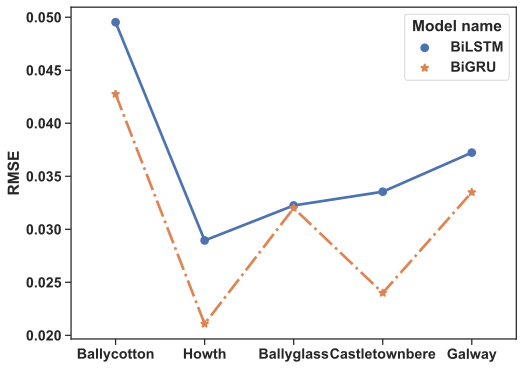

In [22]:
# 创建画布
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
# sns.set_theme(style="white")
rc = {"weight":600}
sns.set(context='notebook', style='ticks', font_scale=1.3,rc={"font.weight":600})


sns.pointplot(x='Port name',y='RMSE',hue='Model name',data=df_compare1,ax=ax1,markers=['o','*'],linestyles=['-','-.'])
ax1.set_ylabel('RMSE',rc)
ax1.set_xlabel('')
# 将x轴斜过来显示更好看
# fig.autofmt_xdate()
fig.savefig("./plot/RMSE2.png",dpi=400)

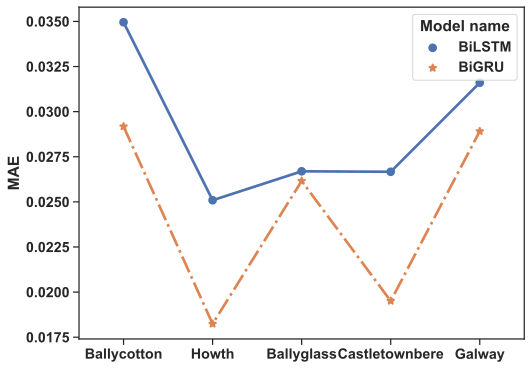

In [21]:
# 创建画布
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)
# sns.set_theme(style="white")
rc = {"weight":600}
sns.set(context='notebook', style='ticks', font_scale=1.3,rc={'font.weight':600})


sns.pointplot(x='Port name',y='MAE',hue='Model name',data=df_compare1,ax=ax1,markers=['o','*'],linestyles=['-','-.'])
ax1.set_ylabel('MAE',rc)
ax1.set_xlabel('')
# 将x轴斜过来显示更好看
# fig.autofmt_xdate()
fig.savefig("./plot/MAE2.png",dpi=400)